<h1>Tugas Pertemuan 5</h1>
<h1>Mencoba ANN</h1>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h1> Load Data </h1> 

In [48]:
imagePaths = 'Dataset\\'
label_list = ['jeruknipis', 'Seledri']
data = []
labels = []

In [49]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [50]:
np.array(data).shape

(100, 32, 32, 3)

<h1>Proses Data</h1>

In [51]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [52]:
print(labels)

['jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Sele

In [53]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<h1> Split Data </h1>

In [54]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [55]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h1>Build ANN</h1>

In [56]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_10 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_11 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [58]:
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [59]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h1> Train Model </h1>

In [60]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 206ms/step - loss: 1.7318 - accuracy: 0.5250 - val_loss: 1.0236 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 1.5583 - accuracy: 0.4250 - val_loss: 1.0603 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 42ms/step - loss: 0.6766 - accuracy: 0.5625 - val_loss: 0.6415 - val_accuracy: 0.7500
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6494 - accuracy: 0.6000 - val_loss: 0.6614 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7352 - accuracy: 0.5000 - val_loss: 0.8866 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8225 - accuracy: 0.4500 - val_loss: 0.7160 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7363 - accuracy: 0.5250 - val_loss: 0.7424 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

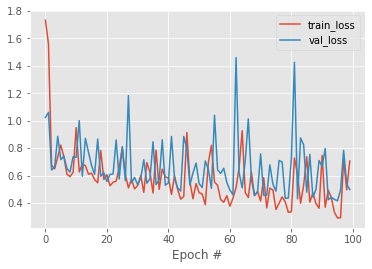

In [61]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h1>Evaluasi</h1>

In [62]:
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

  jeruknipis       0.75      0.75      0.75         8
     Seledri       0.83      0.83      0.83        12

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5740/2175272745.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)
